In [3]:
import pandas as pd

# Ruta del archivo
ruta_datos = "C:/AST_Misisipi/EDA/Datos_crudos_Mississippi.csv"

# Cargar los datos ignorando las primeras 3 filas
df = pd.read_csv(ruta_datos, skiprows=2)

# Mostrar las primeras filas para verificar
df.head()


,5s,15s,20d,6s,14n,10s
0,USGS,7022000,1995-02-03 14:00,CST,212000.0,A:[91]
1,USGS,7022000,1995-02-03 14:21,CST,211000.0,A:[91]
2,USGS,7022000,1995-02-03 15:00,CST,211000.0,A:[91]
3,USGS,7022000,1995-02-03 15:21,CST,211000.0,A:[91]
4,USGS,7022000,1995-02-03 16:00,CST,211000.0,A:[91]


In [4]:
import pandas as pd

# Ruta del archivo
ruta_datos = "C:/AST_Misisipi/EDA/Datos_crudos_Mississippi.csv"

# Cargar los datos ignorando solo las primeras 2 filas
df = pd.read_csv(ruta_datos, skiprows=2)

# Seleccionar solo las columnas 3 y 5 y renombrarlas
df = df.iloc[:, [2, 4]]  # Python cuenta desde 0, por eso usamos 2 y 4
df.columns = ["datetime", "height"]

# Mostrar las primeras filas para verificar
df.head()


,datetime,height
0,1995-02-03 14:00,212000.0
1,1995-02-03 14:21,211000.0
2,1995-02-03 15:00,211000.0
3,1995-02-03 15:21,211000.0
4,1995-02-03 16:00,211000.0


In [54]:
import pandas as pd

# Ruta del archivo
ruta_datos = "C:/AST_Misisipi/EDA/Datos_crudos_Mississippi.csv"

# Cargar los datos
df = pd.read_csv(ruta_datos)

# Verificar el número de observaciones y variables
print(f"Dimensiones del conjunto de datos: {df_resampled.shape}")  # Muestra las filas y columnas

# Ver los primeros registros
print("Primeros 5 registros:")
print(df_resampled.head())

# Ver los últimos registros
print("Últimos 5 registros:")
print(df_resampled.tail())

Dimensiones del conjunto de datos: (525599, 6)
Primeros 5 registros:
                       height  height_moving_avg  month     height_ewm  \
datetime                                                                 
1995-02-03 14:00:00  211500.0                NaN    2.0  211749.885845   
1995-02-03 14:30:00       NaN                NaN    NaN            NaN   
1995-02-03 15:00:00  211000.0                NaN    2.0  211291.343302   
1995-02-03 15:30:00       NaN                NaN    NaN            NaN   
1995-02-03 16:00:00  211500.0                NaN    2.0  211266.484333   

                     height_imputed  height_imputed_arima  
datetime                                                   
1995-02-03 14:00:00        211500.0         211500.000000  
1995-02-03 14:30:00        211500.0         180390.465682  
1995-02-03 15:00:00        211000.0         211000.000000  
1995-02-03 15:30:00        211250.0         204097.899734  
1995-02-03 16:00:00        211500.0         211500.0

In [6]:
# Ver el tamaño del dataset (filas y columnas)
print("Dimensiones del dataset:", df.shape)

# Ver tipos de datos en cada columna
print("\nTipos de datos:")
print(df.dtypes)

# Ver valores nulos en cada columna
print("\nValores nulos en cada columna:")
print(df.isnull().sum())


Dimensiones del dataset: (366082, 2)

Tipos de datos:
datetime    datetime64[ns]
height             float64
dtype: object

Valores nulos en cada columna:
datetime    0
height      0
dtype: int64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de tener tus datos cargados
df = pd.read_csv('C:\Users\Yuliceth Ramos\AST_Misisipi\EDA.csv', parse_dates=['datetime'], index_col='datetime')  # Cambia la ruta a tu archivo

# Verifica que los datos se cargaron correctamente
print(df.head())


# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Graficar la serie temporal
plt.plot(df["datetime"], df["height"], label="Nivel del río (height)", color="blue")

# Agregar etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Altura del nivel del río (pies)")
plt.title("Evolución del Nivel del Río Misisipi en Thebes, IL")

# Rotar las etiquetas del eje X para mejor visualización
plt.xticks(rotation=45)

# Agregar leyenda
plt.legend()

plt.savefig('grafica_serie_temporal.png')  # Guarda en el directorio de trabajo actual

# Mostrar la gráfica
plt.show()


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2594348532.py, line 5)

In [9]:
# Calcular cuántos registros hay en un mes en promedio
promedio_por_mes = df.resample('M', on='datetime').size().mean()
print(f"Promedio de registros por mes: {int(promedio_por_mes)}")


Promedio de registros por mes: 1016


C:\Users\Yuliceth Ramos\AppData\Local\Temp\ipykernel_4908\438250231.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  promedio_por_mes = df.resample('M', on='datetime').size().mean()


In [11]:
import numpy as np

# Calcular la cantidad de años en los datos
años_totales = (df["datetime"].max() - df["datetime"].min()).days / 365

# Calcular el número promedio de registros por año
registros_totales = len(df)
promedio_anual = registros_totales / años_totales

# Calcular la cantidad de registros en 6 meses (medio año)
ventana_semestral = int(promedio_anual / 2)

print(f"Cantidad estimada de registros en 6 meses: {ventana_semestral}")


Cantidad estimada de registros en 6 meses: 6101


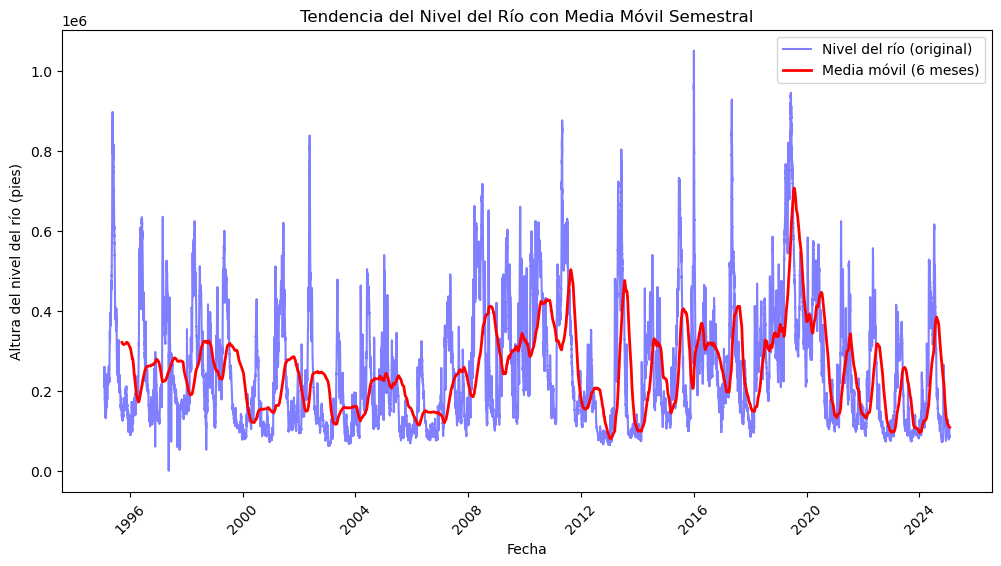

In [12]:
# Aplicar la media móvil con la ventana de 6101 registros
df["height_moving_avg"] = df["height"].rolling(window=6101).mean()

# Graficar la serie original y la media móvil semestral
plt.figure(figsize=(12, 6))

plt.plot(df["datetime"], df["height"], alpha=0.5, label="Nivel del río (original)", color="blue")
plt.plot(df["datetime"], df["height_moving_avg"], label="Media móvil (6 meses)", color="red", linewidth=2)

plt.xlabel("Fecha")
plt.ylabel("Altura del nivel del río (pies)")
plt.title("Tendencia del Nivel del Río con Media Móvil Semestral")
plt.xticks(rotation=45)
plt.legend()

plt.show()


C:\Users\Yuliceth Ramos\AppData\Local\Temp\ipykernel_4908\416421126.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["month"], y=df["height"], palette="Blues")


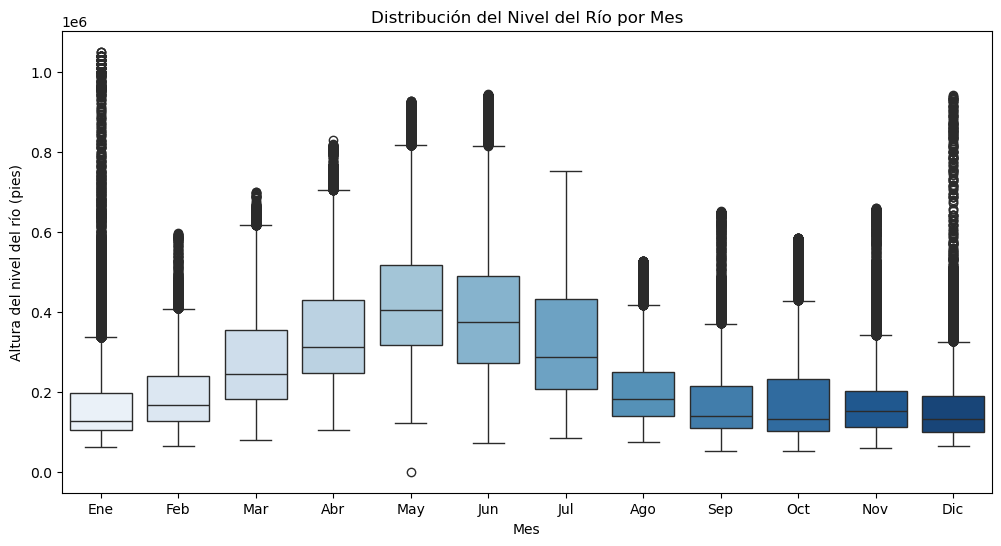

In [13]:
import seaborn as sns

# Crear una nueva columna con el mes
df["month"] = df["datetime"].dt.month

# Graficar el diagrama de caja (boxplot) por mes
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["month"], y=df["height"], palette="Blues")

plt.xlabel("Mes")
plt.ylabel("Altura del nivel del río (pies)")
plt.title("Distribución del Nivel del Río por Mes")
plt.xticks(range(0, 12), ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])

plt.show()


In [68]:
from scipy.stats import zscore

# Calcular el Z-score para cada valor de la columna 'height_imputed'
z_scores = zscore(df_resampled['height_imputed'])

# Identificar los valores con Z-score mayor a 3 o menor a -3
outliers = df_resampled[abs(z_scores) > 3]

# Mostrar los outliers detectados
print(f"Outliers detectados: {outliers}")


Outliers detectados:                        height  height_moving_avg  month     height_ewm  \
datetime                                                                 
1995-05-18 23:00:00  714000.0                NaN    5.0  345308.533835   
1995-05-19 00:00:00  720000.0                NaN    5.0  345672.091800   
1995-05-19 00:30:00       NaN                NaN    NaN            NaN   
1995-05-19 01:00:00  720000.0                NaN    5.0  346035.276142   
1995-05-19 01:30:00       NaN                NaN    NaN            NaN   
...                       ...                ...    ...            ...   
2019-07-05 11:00:00  715000.0      742607.534247    7.0  785939.565602   
2019-07-05 11:30:00  714000.0      742596.575342    7.0  785873.897354   
2019-07-05 12:30:00  714000.0      742574.200913    7.0  785740.916650   
2019-07-05 13:00:00  713000.0      742563.242009    7.0  785674.516909   
2019-07-05 13:30:00  713000.0      742552.283105    7.0  785608.177779   

                

In [40]:
from statsmodels.tsa.stattools import adfuller

# Aplicar la prueba ADF
result = adfuller(df["height"].dropna())  # Eliminar valores nulos
print(f'Estadístico ADF: {result[0]}')
print(f'Valor p: {result[1]}')
print(f'Valores críticos: {result[4]}')

if result[1] < 0.05:
    print("Rechazamos la hipótesis nula: los datos son estacionarios.")
else:
    print("No podemos rechazar la hipótesis nula: los datos no son estacionarios.")


Estadístico ADF: -10.271382707554162
Valor p: 3.9931950914494306e-18
Valores críticos: {'1%': np.float64(-3.4303678676510305), '5%': np.float64(-2.8615478972850723), '10%': np.float64(-2.5667742034374763)}
Rechazamos la hipótesis nula: los datos son estacionarios.


In [41]:
from statsmodels.tsa.stattools import kpss

# Aplicar la prueba KPSS
result_kpss = kpss(df["height"].dropna(), regression='c')  # 'c' para prueba de nivel
print(f'Estadístico KPSS: {result_kpss[0]}')
print(f'Valor p: {result_kpss[1]}')
print(f'Valores críticos: {result_kpss[3]}')

if result_kpss[1] < 0.05:
    print("Rechazamos la hipótesis nula: los datos no son estacionarios.")
else:
    print("No podemos rechazar la hipótesis nula: los datos son estacionarios.")


Estadístico KPSS: 1.82020199176406
Valor p: 0.01
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Rechazamos la hipótesis nula: los datos no son estacionarios.


In [44]:
# Para hacer análissi de Autocorrelación primero se ajusta la frecuencia de los datos a 30 minutos
# Resamplear los datos a media hora y calcular la media
df_resampled = df.set_index('datetime').resample('30T').mean()

# Verificar si hay valores faltantes
print(df_resampled.isnull().sum())  # Número de valores faltantes en cada columna
# Verificar la proporción de valores faltantes
missing_data_proportion = df_resampled.isnull().mean() * 100  # Proporción de valores faltantes en cada columna

# Imprimir la proporción de datos faltantes para cada columna
print(f'Proporción de datos faltantes en la columna "height": {missing_data_proportion["height"]:.2f}%')



height               161157
height_moving_avg    164945
month                161157
height_ewm           161157
dtype: int64
Proporción de datos faltantes en la columna "height": 30.66%


In [45]:
# Imputar usando medias móviles con una ventana de 5 periodos (ajustable)
df_resampled['height_imputed'] = df_resampled['height'].fillna(df_resampled['height'].rolling(window=5, min_periods=1).mean())

# Verificar que los datos faltantes han sido imputados
print(df_resampled.isnull().sum())  # Debería dar 0 si la imputación fue exitosa


height               161157
height_moving_avg    164945
month                161157
height_ewm           161157
height_imputed        18394
dtype: int64


In [46]:
from statsmodels.tsa.arima.model import ARIMA

# Entrenar el modelo ARIMA para imputar los valores faltantes
model = ARIMA(df_resampled['height'], order=(1, 1, 1))  # Puedes probar con diferentes valores de p, d, q
model_fit = model.fit()

# Imputar los valores faltantes con el modelo ARIMA
df_resampled['height_imputed_arima'] = df_resampled['height'].fillna(model_fit.predict(start=0, end=len(df_resampled)-1))

# Verificar que los datos faltantes han sido imputados
print(df_resampled.isnull().sum())  # Debería dar 0 si la imputación fue exitosa


height                  161157
height_moving_avg       164945
month                   161157
height_ewm              161157
height_imputed           18394
height_imputed_arima         0
dtype: int64


In [50]:
# Ver las primeras filas del DataFrame para comprobar los datos imputados
print(df_resampled.head())

# Ver las últimas filas para comprobar los datos imputados
print(df_resampled.tail())


                       height  height_moving_avg  month     height_ewm  \
datetime                                                                 
1995-02-03 14:00:00  211500.0                NaN    2.0  211749.885845   
1995-02-03 14:30:00       NaN                NaN    NaN            NaN   
1995-02-03 15:00:00  211000.0                NaN    2.0  211291.343302   
1995-02-03 15:30:00       NaN                NaN    NaN            NaN   
1995-02-03 16:00:00  211500.0                NaN    2.0  211266.484333   

                     height_imputed  height_imputed_arima  
datetime                                                   
1995-02-03 14:00:00        211500.0         211500.000000  
1995-02-03 14:30:00        211500.0         180390.465682  
1995-02-03 15:00:00        211000.0         211000.000000  
1995-02-03 15:30:00        211250.0         204097.899734  
1995-02-03 16:00:00        211500.0         211500.000000  
                      height  height_moving_avg  month     he

In [51]:
print(df_resampled.isnull().sum())  # Verificar si hay valores nulos en todas las columnas


height                  161157
height_moving_avg       164945
month                   161157
height_ewm              161157
height_imputed           18394
height_imputed_arima         0
dtype: int64


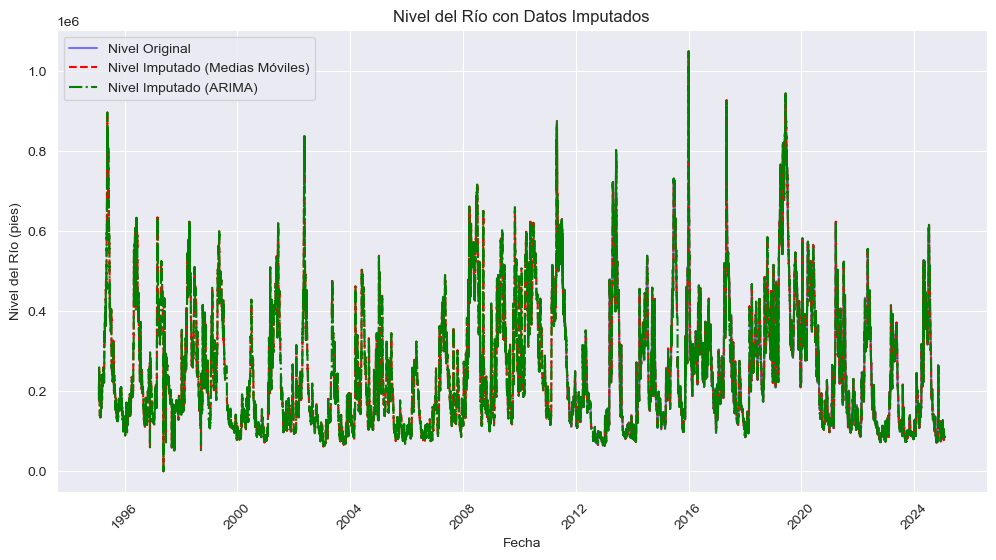

In [52]:
# Graficar los datos originales vs los imputados
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['height'], label='Nivel Original', color='blue', alpha=0.5)
plt.plot(df_resampled.index, df_resampled['height_imputed'], label='Nivel Imputado (Medias Móviles)', color='red', linestyle='--')
plt.plot(df_resampled.index, df_resampled['height_imputed_arima'], label='Nivel Imputado (ARIMA)', color='green', linestyle='-.')
plt.title('Nivel del Río con Datos Imputados')
plt.xlabel('Fecha')
plt.ylabel('Nivel del Río (pies)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [55]:
# Calcular estadísticas descriptivas
statistics = df_resampled['height_imputed'].describe()

# Ver el resultado
print("Estadísticas Descriptivas:")
print(statistics)

# Calcular percentiles específicos si es necesario
percentiles = df_resampled['height_imputed'].quantile([0.25, 0.5, 0.75])  # Percentiles 25%, 50% y 75%
print(f"\nPercentiles 25%, 50% y 75%: \n{percentiles}")


Estadísticas Descriptivas:
count    5.072050e+05
mean     2.513572e+05
std      1.540894e+05
min      0.000000e+00
25%      1.290000e+05
50%      2.040000e+05
75%      3.370000e+05
max      1.050000e+06
Name: height_imputed, dtype: float64

Percentiles 25%, 50% y 75%: 
0.25    129000.0
0.50    204000.0
0.75    337000.0
Name: height_imputed, dtype: float64


In [56]:
# Calcular el Rango Intercuartílico (IQR)
Q1 = df_resampled['height_imputed'].quantile(0.25)  # Primer cuartil (25%)
Q3 = df_resampled['height_imputed'].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1  # Rango Intercuartílico

# Imprimir el resultado
print(f"Rango Intercuartílico (IQR): {IQR}")

# También se puede calcular el rango intercuartílico usando describe
print(df_resampled['height_imputed'].describe())  # Esto te muestra Q1, Q3, y más


Rango Intercuartílico (IQR): 208000.0
count    5.072050e+05
mean     2.513572e+05
std      1.540894e+05
min      0.000000e+00
25%      1.290000e+05
50%      2.040000e+05
75%      3.370000e+05
max      1.050000e+06
Name: height_imputed, dtype: float64


In [59]:
# Asegurarse de que no haya valores faltantes
df_resampled['height_imputed'] = df_resampled['height_imputed'].fillna(method='ffill') 


In [60]:
# Eliminar filas con valores faltantes
df_resampled = df_resampled.dropna(subset=['height_imputed'])


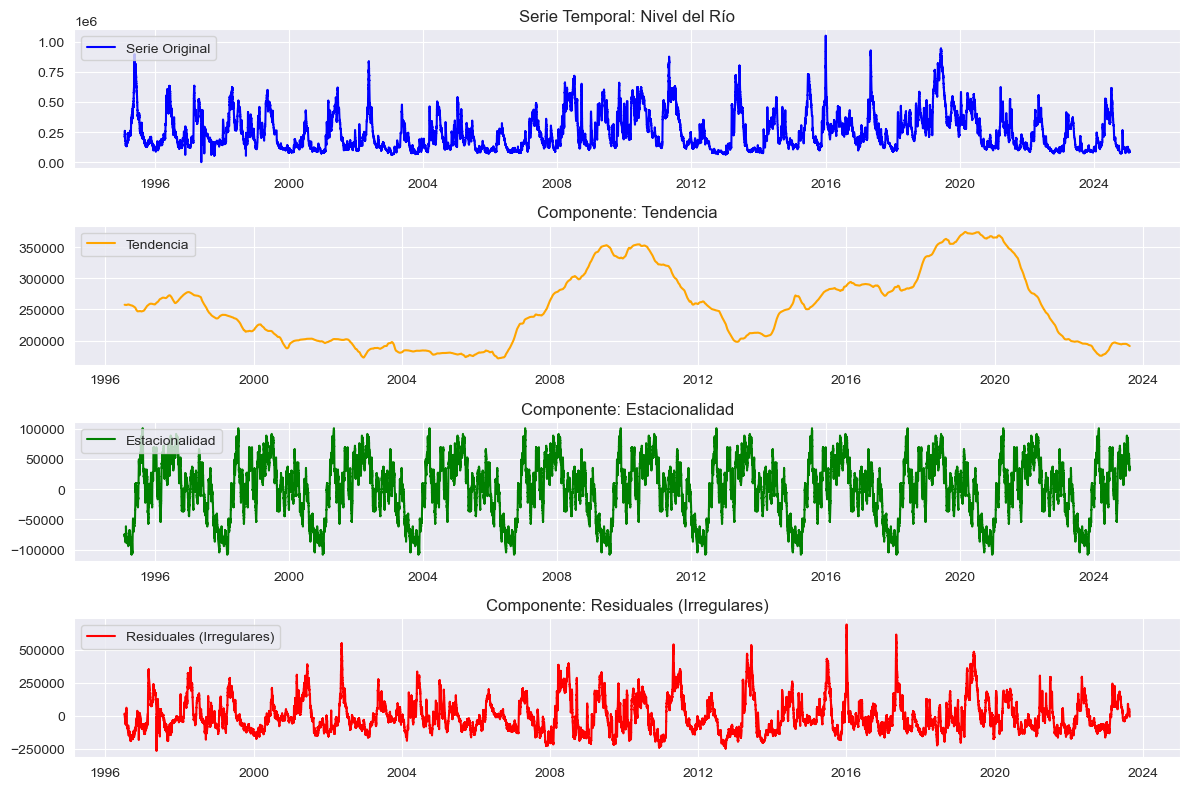

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomponer la serie temporal
decomposition = seasonal_decompose(df_resampled['height_imputed'], model='additive', period=50000)

# Graficar los componentes
plt.figure(figsize=(12, 8))

# Gráfico de la serie original
plt.subplot(411)
plt.plot(df_resampled.index, df_resampled['height_imputed'], label='Serie Original', color='blue')
plt.legend(loc='upper left')
plt.title('Serie Temporal: Nivel del Río')

# Gráfico de la tendencia
plt.subplot(412)
plt.plot(df_resampled.index, decomposition.trend, label='Tendencia', color='orange')
plt.legend(loc='upper left')
plt.title('Componente: Tendencia')

# Gráfico de la estacionalidad
plt.subplot(413)
plt.plot(df_resampled.index, decomposition.seasonal, label='Estacionalidad', color='green')
plt.legend(loc='upper left')
plt.title('Componente: Estacionalidad')

# Gráfico de los residuales (componentes irregulares)
plt.subplot(414)
plt.plot(df_resampled.index, decomposition.resid, label='Residuales (Irregulares)', color='red')
plt.legend(loc='upper left')
plt.title('Componente: Residuales (Irregulares)')

# Ajustar los márgenes y mostrar el gráfico
plt.tight_layout()
plt.show()


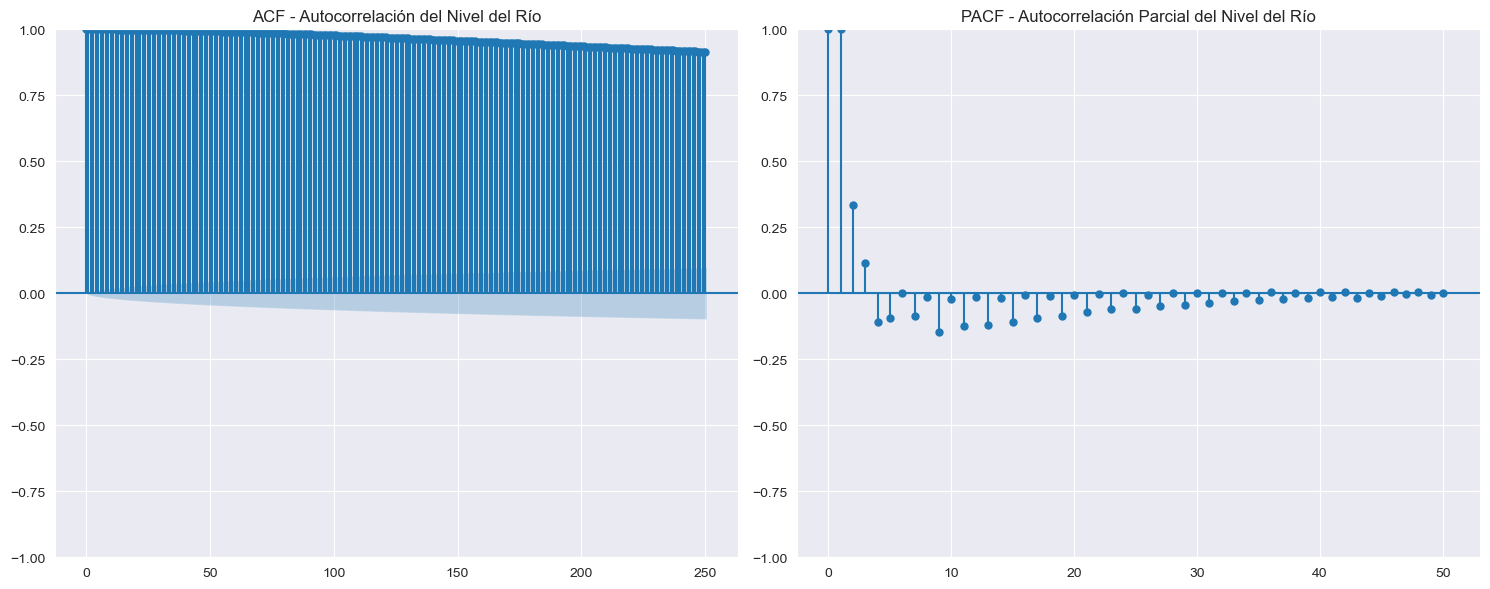

In [77]:
# Crear una figura con dos subgráficos (uno al lado del otro)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Graficar ACF en el primer subgráfico
plot_acf(df_resampled['height_imputed'], lags=acf_lags, alpha=0.001, ax=ax1)
ax1.set_title("ACF - Autocorrelación del Nivel del Río")

# Graficar PACF en el segundo subgráfico
plot_pacf(df_resampled['height_imputed'], lags=pacf_lags, alpha=0.05, ax=ax2)
ax2.set_title("PACF - Autocorrelación Parcial del Nivel del Río")

# Ajustar el espaciado entre las gráficas
plt.tight_layout()
plt.show()



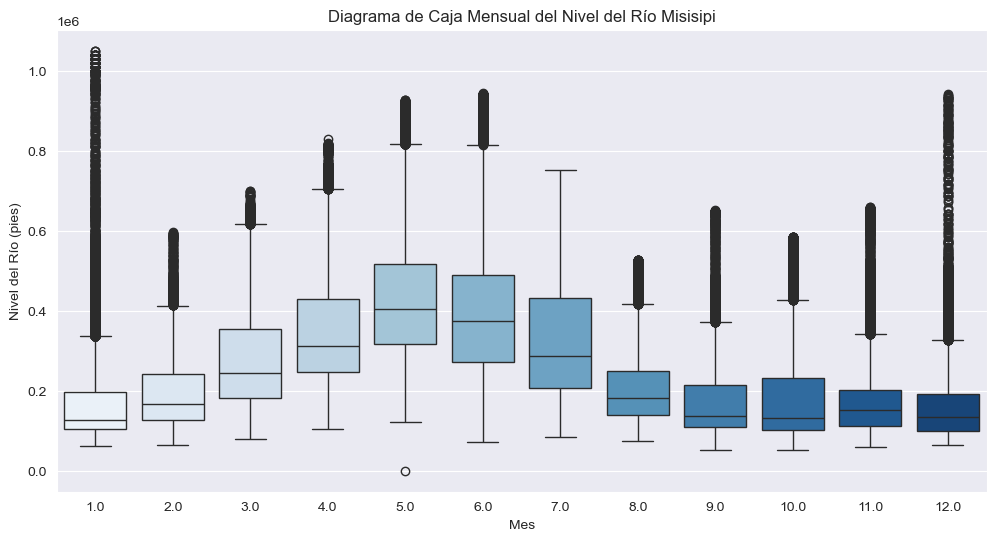

In [86]:
# Agrupar por mes y crear un gráfico de cajas para comparar distribuciones mensuales
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_resampled['month'], y=df_resampled['height_imputed'], palette="Blues")
plt.title('Diagrama de Caja Mensual del Nivel del Río Misisipi')
plt.xlabel('Mes')
plt.ylabel('Nivel del Río (pies)')
plt.show()


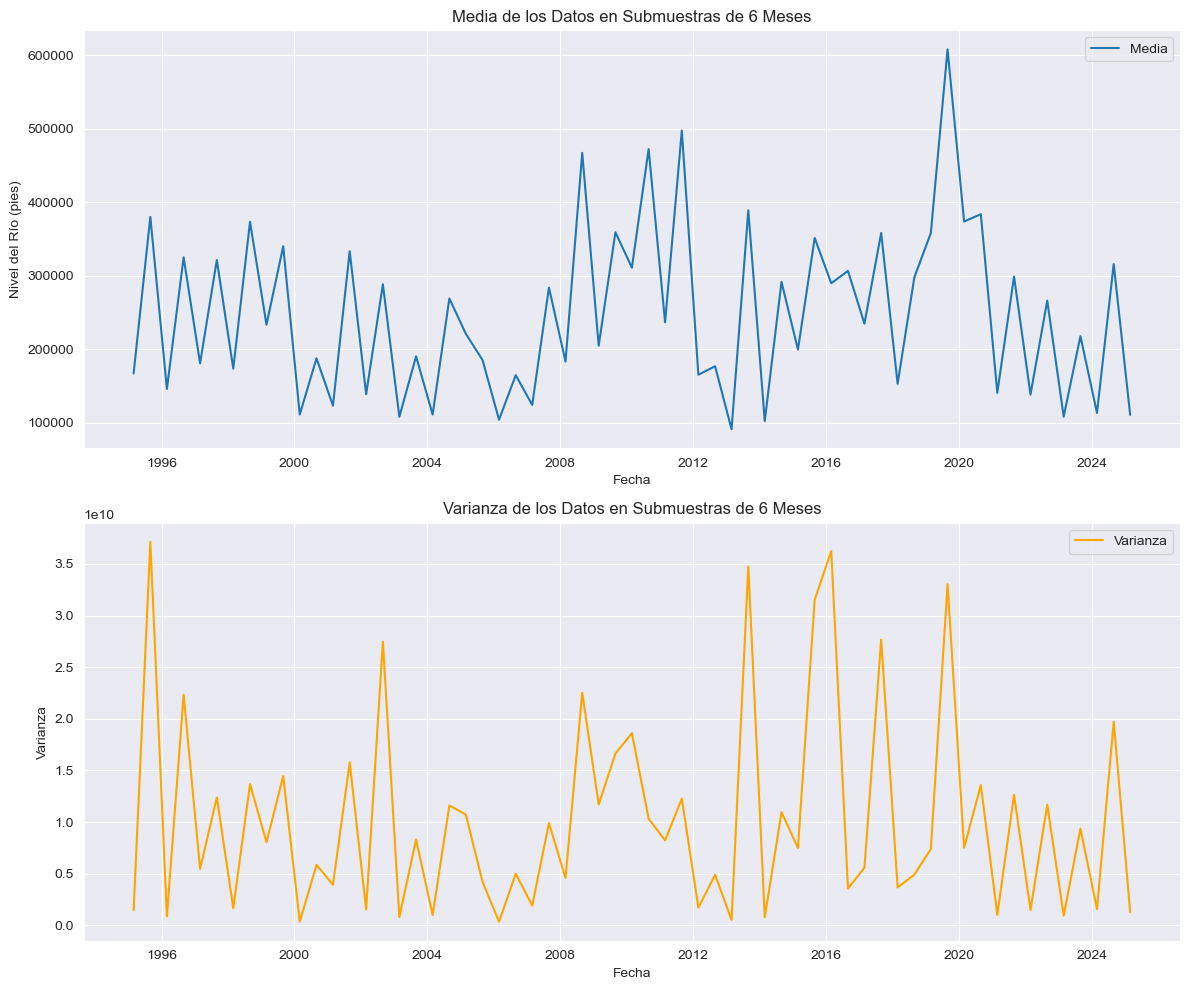

In [87]:
# 6.	Estabilidad de la serie
# Dividir los datos en submuestras (por ejemplo, cada 6 meses) y calcular la media y varianza
subsample = df_resampled['height_imputed'].resample('6M')  # '6M' para cada 6 meses

# Calcular la media y la varianza de cada submuestra
mean_subsamples = subsample.mean()
var_subsamples = subsample.var()

# Graficar la media y la varianza en función del tiempo
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico de la media
ax[0].plot(mean_subsamples.index, mean_subsamples, label='Media')
ax[0].set_title('Media de los Datos en Submuestras de 6 Meses')
ax[0].set_xlabel('Fecha')
ax[0].set_ylabel('Nivel del Río (pies)')
ax[0].legend()

# Gráfico de la varianza
ax[1].plot(var_subsamples.index, var_subsamples, label='Varianza', color='orange')
ax[1].set_title('Varianza de los Datos en Submuestras de 6 Meses')
ax[1].set_xlabel('Fecha')
ax[1].set_ylabel('Varianza')
ax[1].legend()

# Ajustar el espaciado y mostrar las gráficas
plt.tight_layout()
plt.show()



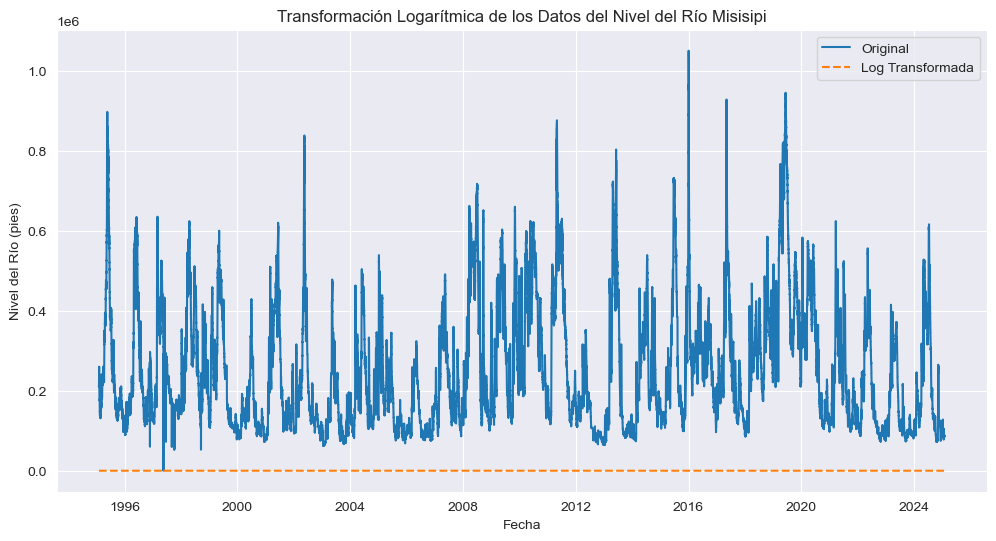

In [88]:
# 6.2. Transformaciones de datos 
# Aplicar logaritmo a la serie para estabilizar la varianza
df_resampled['height_log'] = np.log(df_resampled['height_imputed'])

# Graficar para comparar la serie original con la transformada
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['height_imputed'], label='Original')
plt.plot(df_resampled.index, df_resampled['height_log'], label='Log Transformada', linestyle='--')
plt.title('Transformación Logarítmica de los Datos del Nivel del Río Misisipi')
plt.xlabel('Fecha')
plt.ylabel('Nivel del Río (pies)')
plt.legend()
plt.show()


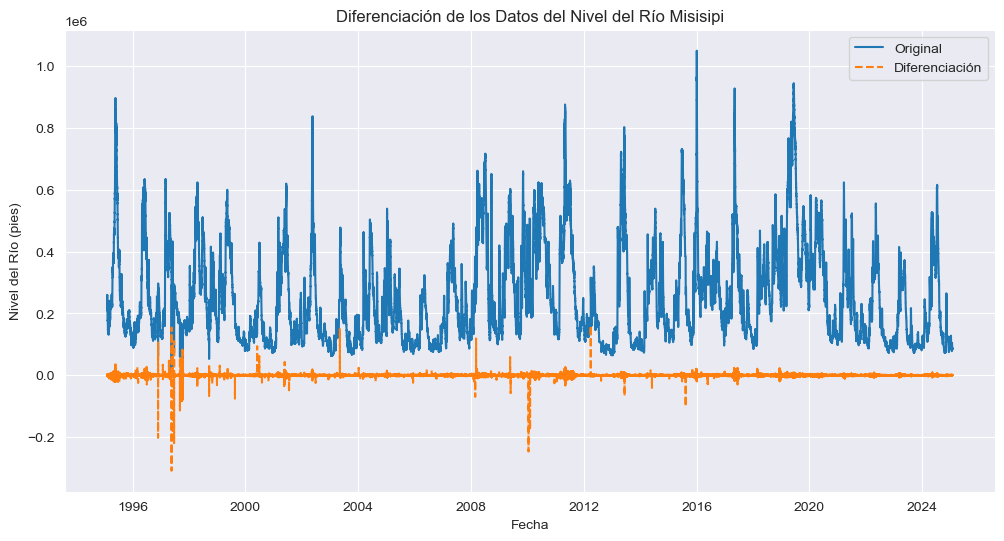

In [92]:
# Diferenciación de la serie para eliminar la tendencia
df_resampled['height_diff'] = df_resampled['height_imputed'].diff()

# Graficar para comparar la serie original con la diferenciada
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['height_imputed'], label='Original')
plt.plot(df_resampled.index, df_resampled['height_diff'], label='Diferenciación', linestyle='--')
plt.title('Diferenciación de los Datos del Nivel del Río Misisipi')
plt.xlabel('Fecha')
plt.ylabel('Nivel del Río (pies)')
plt.legend()
plt.show()


In [83]:
# Agrupar por mes y calcular el promedio
df_monthly = df_resampled.resample('M').mean()


In [93]:
from statsmodels.tsa.stattools import adfuller

# Realizar la prueba ADF en la serie diferenciada
adf_test = adfuller(df_resampled['height_diff'].dropna())

# Mostrar los resultados de la prueba ADF
print(f'Estadístico ADF: {adf_test[0]}')
print(f'Valor p: {adf_test[1]}')
print(f'Valores críticos: {adf_test[4]}')

# Evaluar si la serie es estacionaria
if adf_test[1] < 0.05:
    print("La serie es estacionaria según la prueba ADF.")
else:
    print("La serie no es estacionaria según la prueba ADF.")


Estadístico ADF: -49.2709043155488
Valor p: 0.0
Valores críticos: {'1%': np.float64(-3.4303624441610054), '5%': np.float64(-2.8615455001732797), '10%': np.float64(-2.566772927541219)}
La serie es estacionaria según la prueba ADF.


In [94]:
from statsmodels.tsa.stattools import kpss

# Realizar la prueba KPSS en la serie diferenciada
kpss_test = kpss(df_resampled['height_diff'].dropna(), regression='c')

# Mostrar los resultados de la prueba KPSS
print(f'Estadístico KPSS: {kpss_test[0]}')
print(f'Valor p: {kpss_test[1]}')
print(f'Valores críticos: {kpss_test[3]}')

# Evaluar si la serie es estacionaria
if kpss_test[1] < 0.05:
    print("La serie no es estacionaria según la prueba KPSS.")
else:
    print("La serie es estacionaria según la prueba KPSS.")


Estadístico KPSS: 0.004092219615660889
Valor p: 0.1
Valores críticos: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
La serie es estacionaria según la prueba KPSS.


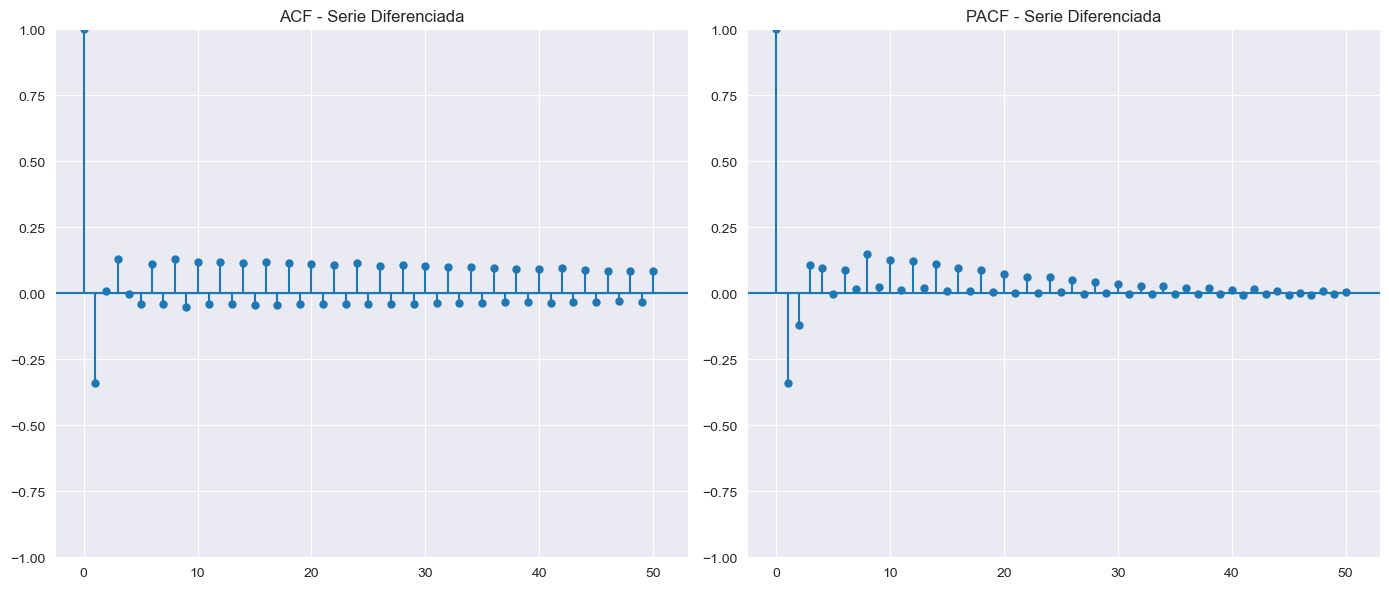

In [96]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar ACF y PACF para la serie diferenciada
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# ACF
plot_acf(df_resampled['height_diff'].dropna(), lags=50, ax=axs[0], alpha=0.05)
axs[0].set_title('ACF - Serie Diferenciada')

# PACF
plot_pacf(df_resampled['height_diff'].dropna(), lags=50, ax=axs[1], alpha=0.05)
axs[1].set_title('PACF - Serie Diferenciada')

plt.tight_layout()
plt.show()


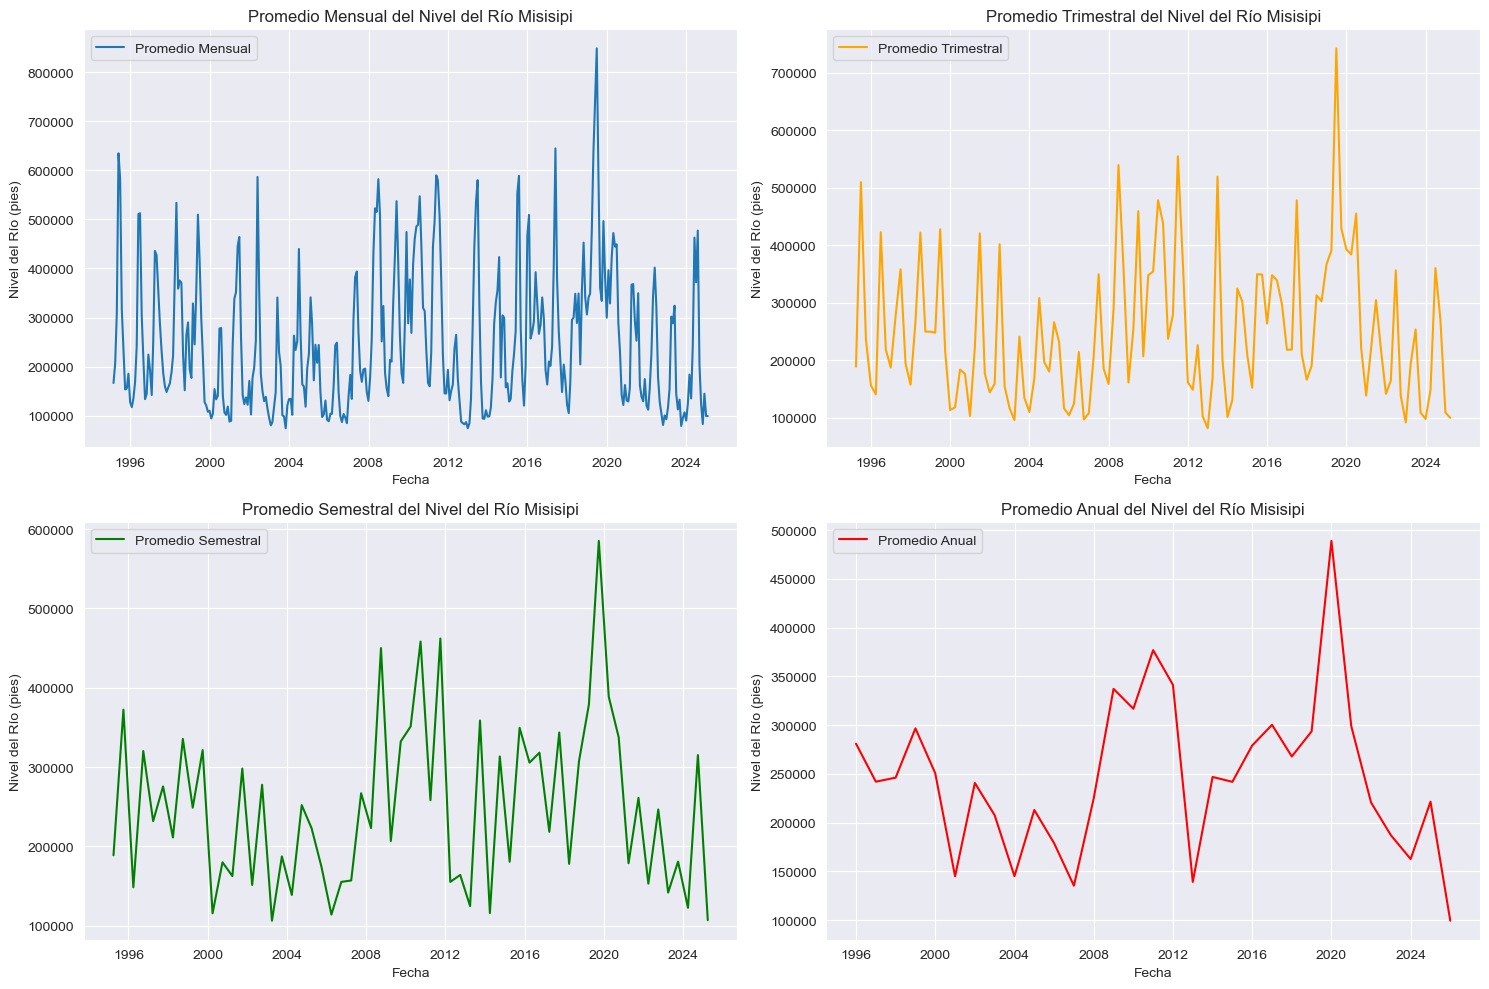

In [84]:
# Crear una figura con 4 subgráficos (2 arriba, 2 abajo)
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Graficar el promedio mensual en el primer subgráfico
axs[0, 0].plot(df_monthly.index, df_monthly['height_imputed'], label='Promedio Mensual')
axs[0, 0].set_title('Promedio Mensual del Nivel del Río Misisipi')
axs[0, 0].set_xlabel('Fecha')
axs[0, 0].set_ylabel('Nivel del Río (pies)')
axs[0, 0].legend()

# Graficar el promedio trimestral en el segundo subgráfico
axs[0, 1].plot(df_quarterly.index, df_quarterly['height_imputed'], label='Promedio Trimestral', color='orange')
axs[0, 1].set_title('Promedio Trimestral del Nivel del Río Misisipi')
axs[0, 1].set_xlabel('Fecha')
axs[0, 1].set_ylabel('Nivel del Río (pies)')
axs[0, 1].legend()

# Graficar el promedio semestral en el tercer subgráfico
axs[1, 0].plot(df_semiannual.index, df_semiannual['height_imputed'], label='Promedio Semestral', color='green')
axs[1, 0].set_title('Promedio Semestral del Nivel del Río Misisipi')
axs[1, 0].set_xlabel('Fecha')
axs[1, 0].set_ylabel('Nivel del Río (pies)')
axs[1, 0].legend()

# Graficar el promedio anual en el cuarto subgráfico
axs[1, 1].plot(df_yearly.index, df_yearly['height_imputed'], label='Promedio Anual', color='red')
axs[1, 1].set_title('Promedio Anual del Nivel del Río Misisipi')
axs[1, 1].set_xlabel('Fecha')
axs[1, 1].set_ylabel('Nivel del Río (pies)')
axs[1, 1].legend()

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()
plt.show()


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as smtsa
import seaborn as sns
import warnings

# Ignorar advertencias
warnings.filterwarnings("ignore")

# Configuración de la gráfica
plt.rcParams['text.usetex'] = False
sns.set_style("darkgrid")

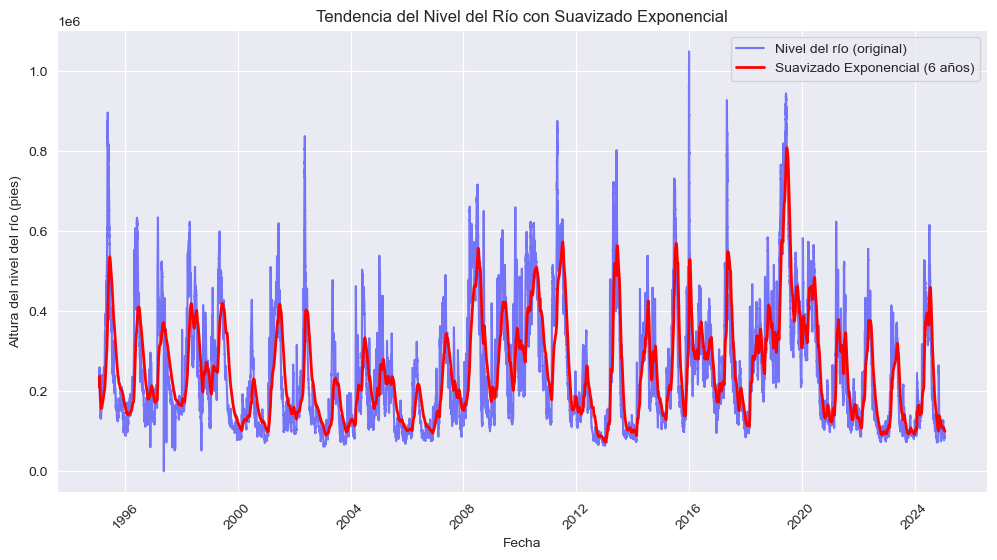

In [34]:
# Suavizamiento exponencial con un factor de suavizado alpha
df["height_ewm"] = df["height"].ewm(span=2190).mean()  #2190 días corresponden a 6 añoes

# Graficar la serie original y el suavizado exponencial
plt.figure(figsize=(12, 6))
plt.plot(df["datetime"], df["height"], alpha=0.5, label="Nivel del río (original)", color="blue")
plt.plot(df["datetime"], df["height_ewm"], label="Suavizado Exponencial (6 años)", color="red", linewidth=2)

plt.xlabel("Fecha")
plt.ylabel("Altura del nivel del río (pies)")
plt.title("Tendencia del Nivel del Río con Suavizado Exponencial")
plt.xticks(rotation=45)
plt.legend()
plt.show()


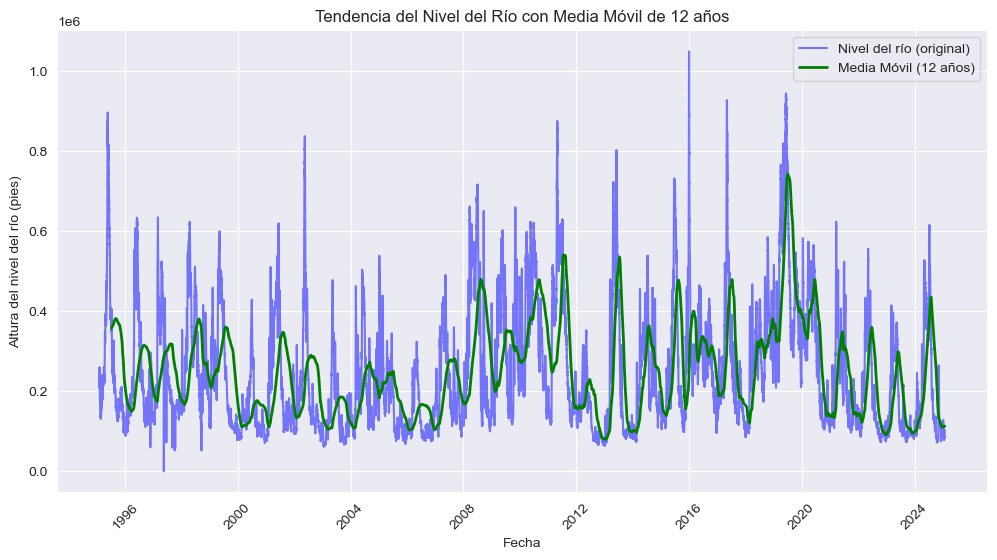

In [35]:
# Media móvil de 12 años (ajustar el tamaño según lo necesites)
df["height_moving_avg"] = df["height"].rolling(window=4380).mean()

# Graficar la serie original y la media móvil
plt.figure(figsize=(12, 6))
plt.plot(df["datetime"], df["height"], alpha=0.5, label="Nivel del río (original)", color="blue")
plt.plot(df["datetime"], df["height_moving_avg"], label="Media Móvil (12 años)", color="green", linewidth=2)

plt.xlabel("Fecha")
plt.ylabel("Altura del nivel del río (pies)")
plt.title("Tendencia del Nivel del Río con Media Móvil de 12 años")
plt.xticks(rotation=45)
plt.legend()
plt.show()


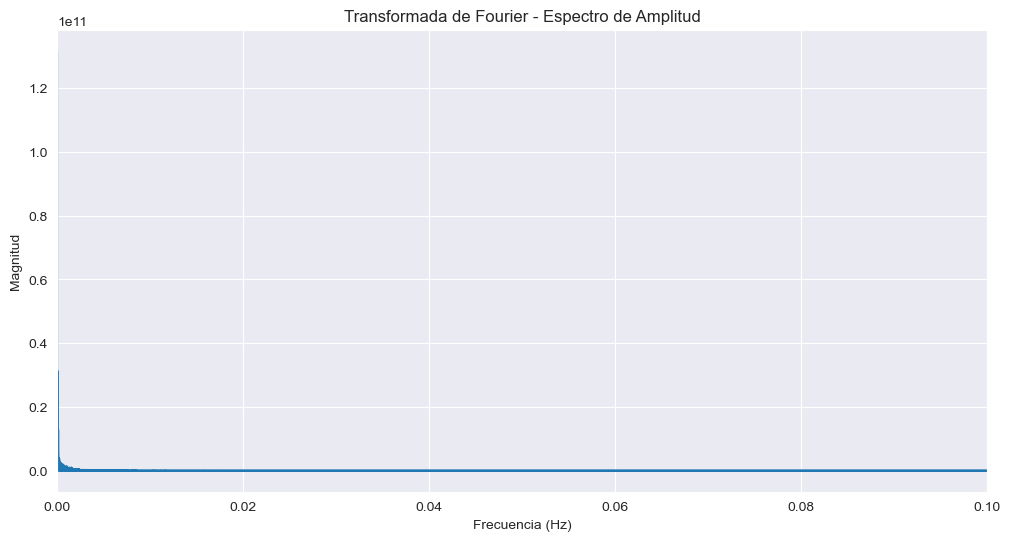

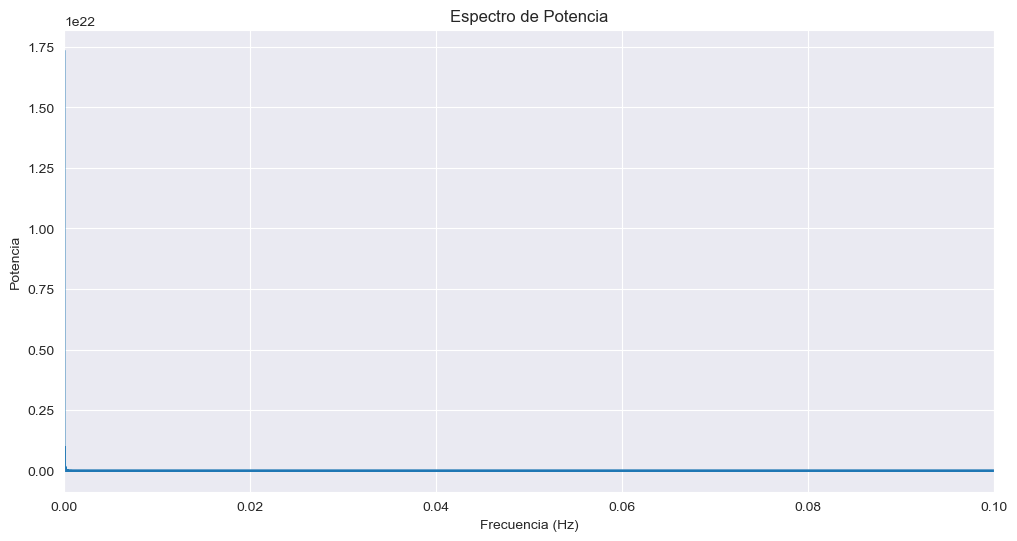

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Realizar la transformada de Fourier
# Suponemos que df_resampled['height_imputed'] es la serie temporal
data = df_resampled['height_imputed'].dropna()

# Realizar la FFT (Transformada Rápida de Fourier)
fft_result = np.fft.fft(data)
fft_freq = np.fft.fftfreq(len(data))

# Obtener la magnitud de la FFT (espectro de amplitud)
fft_magnitude = np.abs(fft_result)

# Graficar el espectro de amplitud
plt.figure(figsize=(12, 6))
plt.plot(fft_freq, fft_magnitude)
plt.title("Transformada de Fourier - Espectro de Amplitud")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.xlim(0, 0.1)  # Limitar el eje X para observar mejor las frecuencias bajas
plt.show()

# Para visualizar el espectro de potencia, se calcula el cuadrado de la magnitud
power_spectrum = np.square(fft_magnitude)

# Graficar el espectro de potencia
plt.figure(figsize=(12, 6))
plt.plot(fft_freq, power_spectrum)
plt.title("Espectro de Potencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Potencia")
plt.xlim(0, 0.1)  # Limitar el eje X para observar mejor las frecuencias bajas
plt.show()


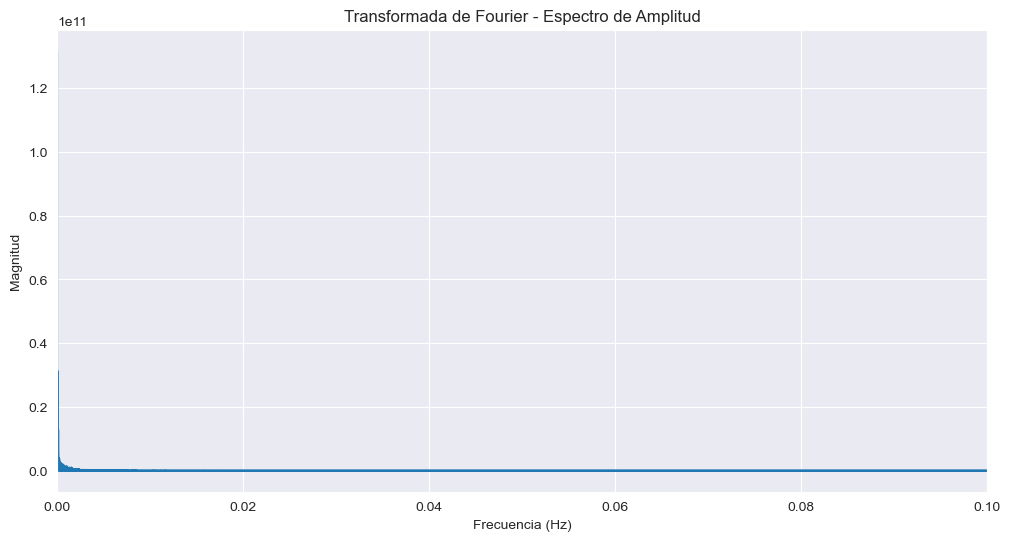

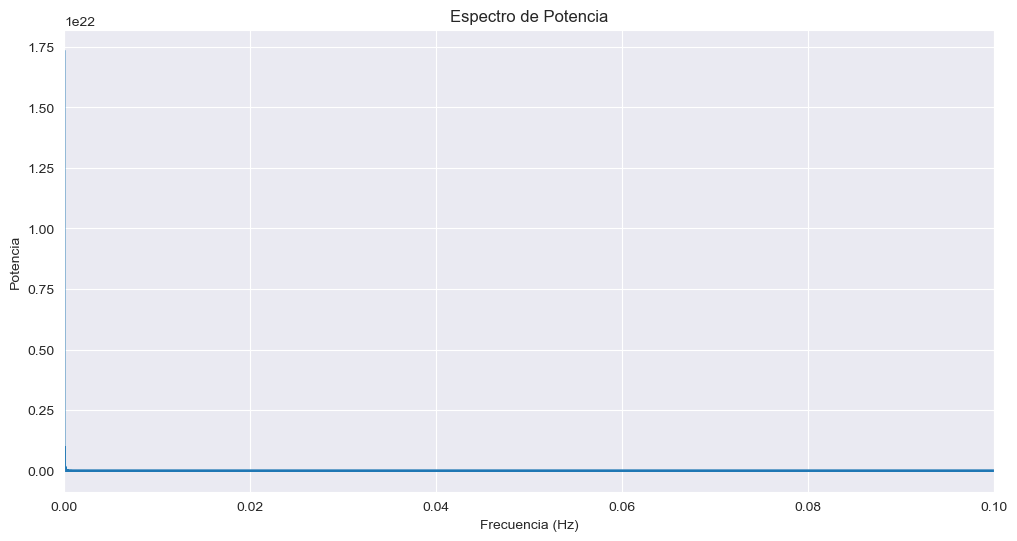

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Realizar la transformada de Fourier
# Suponemos que df_resampled['height_imputed'] es la serie temporal
data = df_resampled['height_imputed'].dropna()

# Realizar la FFT (Transformada Rápida de Fourier)
fft_result = np.fft.fft(data)
fft_freq = np.fft.fftfreq(len(data))

# Obtener la magnitud de la FFT (espectro de amplitud)
fft_magnitude = np.abs(fft_result)

# Graficar el espectro de amplitud
plt.figure(figsize=(12, 6))
plt.plot(fft_freq, fft_magnitude)
plt.title("Transformada de Fourier - Espectro de Amplitud")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.xlim(0, 0.1)  # Limitar el eje X para observar mejor las frecuencias bajas
plt.show()

# Para visualizar el espectro de potencia, se calcula el cuadrado de la magnitud
power_spectrum = np.square(fft_magnitude)

# Graficar el espectro de potencia
plt.figure(figsize=(12, 6))
plt.plot(fft_freq, power_spectrum)
plt.title("Espectro de Potencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Potencia")
plt.xlim(0, 0.1)  # Limitar el eje X para observar mejor las frecuencias bajas
plt.show()


In [98]:
from scipy.stats import zscore

# Calcular el Z-score para la serie de nivel de agua (height_imputed)
z_scores = zscore(df_resampled['height_imputed'].dropna())

# Definir un umbral para los outliers (usualmente se usa 3 o 2.5 como valor crítico)
threshold = 3

# Filtrar los datos que están por fuera del umbral de Z-score
df_filtered = df_resampled[(np.abs(z_scores) < threshold)]

# Verificar el resultado
print(f"Número de outliers eliminados: {len(df_resampled) - len(df_filtered)}")


Número de outliers eliminados: 6439


In [99]:
from scipy.stats import zscore

# Calcular el Z-score para la serie de nivel de agua (height_imputed)
z_scores = zscore(df_resampled['height_imputed'].dropna())

# Definir un umbral para los outliers (usualmente se usa 3 o 2.5 como valor crítico)
threshold = 3

# Filtrar los datos que están por fuera del umbral de Z-score
df_filtered = df_resampled[(np.abs(z_scores) < threshold)]

# Verificar el resultado
print(f"Número de outliers eliminados: {len(df_resampled) - len(df_filtered)}")


Número de outliers eliminados: 6439


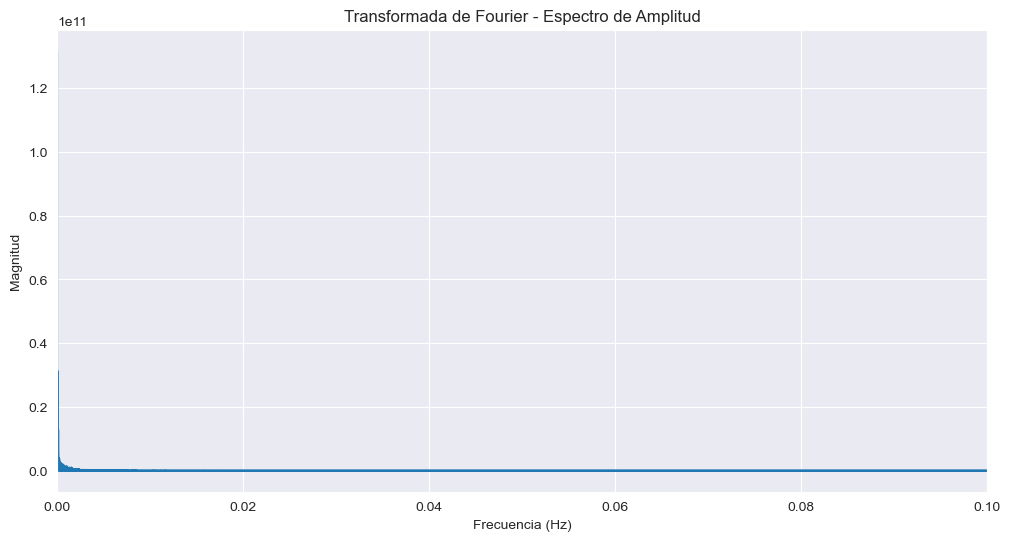

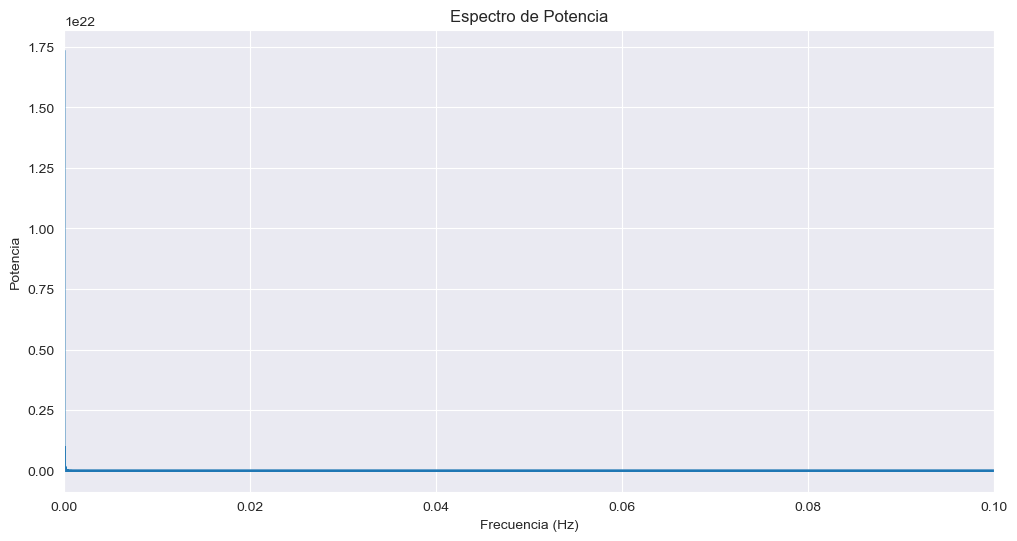

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Realizar la transformada de Fourier
# Suponemos que df_resampled['height_imputed'] es la serie temporal
data = df_resampled['height_imputed'].dropna()

# Realizar la FFT (Transformada Rápida de Fourier)
fft_result = np.fft.fft(data)
fft_freq = np.fft.fftfreq(len(data))

# Obtener la magnitud de la FFT (espectro de amplitud)
fft_magnitude = np.abs(fft_result)

# Graficar el espectro de amplitud
plt.figure(figsize=(12, 6))
plt.plot(fft_freq, fft_magnitude)
plt.title("Transformada de Fourier - Espectro de Amplitud")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.xlim(0, 0.1)  # Limitar el eje X para observar mejor las frecuencias bajas
plt.show()

# Para visualizar el espectro de potencia, se calcula el cuadrado de la magnitud
power_spectrum = np.square(fft_magnitude)

# Graficar el espectro de potencia
plt.figure(figsize=(12, 6))
plt.plot(fft_freq, power_spectrum)
plt.title("Espectro de Potencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Potencia")
plt.xlim(0, 0.1)  # Limitar el eje X para observar mejor las frecuencias bajas
plt.show()


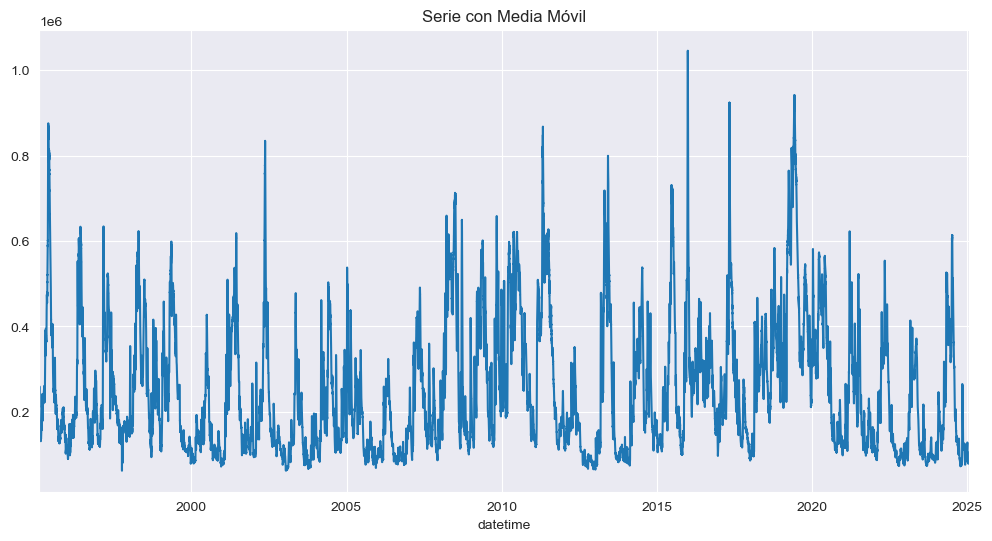

In [101]:
# Aplicar media móvil con ventana de 5 periodos (ajustar si es necesario)
df_resampled['height_moving_avg'] = df_resampled['height_imputed'].rolling(window=5).mean()

# Graficar la serie suavizada
df_resampled['height_moving_avg'].plot(figsize=(12, 6), title="Serie con Media Móvil")
plt.show()


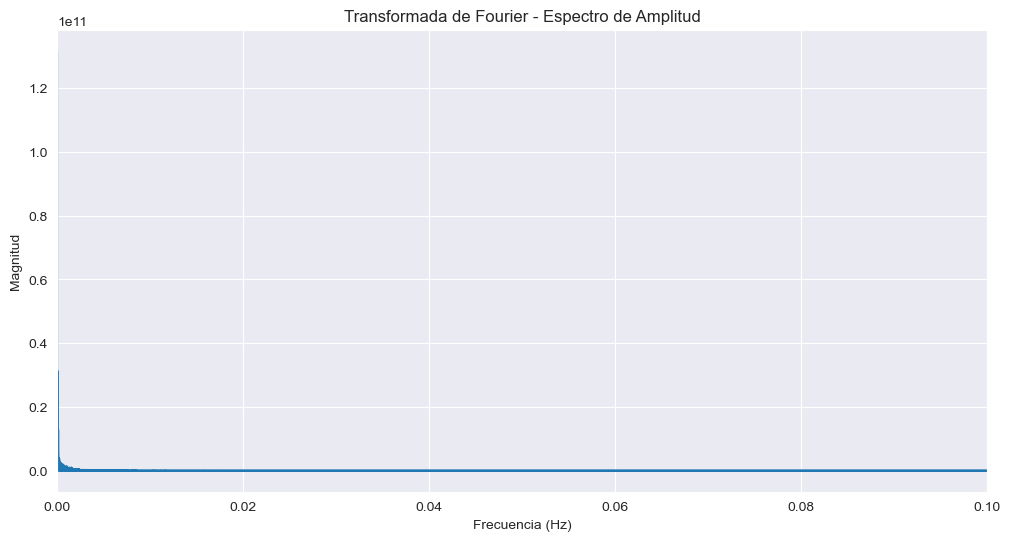

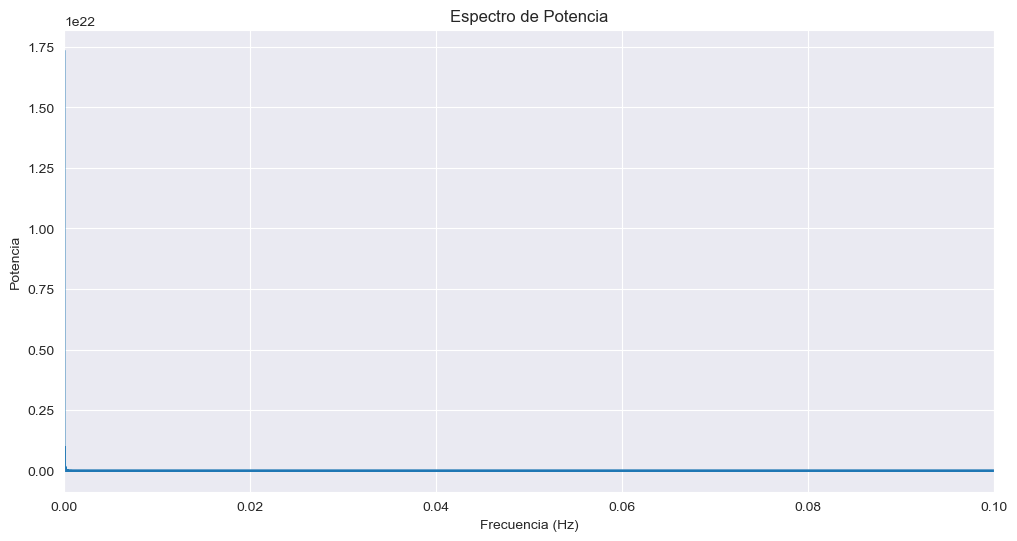

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Realizar la transformada de Fourier
# Suponemos que df_resampled['height_imputed'] es la serie temporal
data = df_resampled['height_imputed'].dropna()

# Realizar la FFT (Transformada Rápida de Fourier)
fft_result = np.fft.fft(data)
fft_freq = np.fft.fftfreq(len(data))

# Obtener la magnitud de la FFT (espectro de amplitud)
fft_magnitude = np.abs(fft_result)

# Graficar el espectro de amplitud
plt.figure(figsize=(12, 6))
plt.plot(fft_freq, fft_magnitude)
plt.title("Transformada de Fourier - Espectro de Amplitud")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.xlim(0, 0.1)  # Limitar el eje X para observar mejor las frecuencias bajas
plt.show()

# Para visualizar el espectro de potencia, se calcula el cuadrado de la magnitud
power_spectrum = np.square(fft_magnitude)

# Graficar el espectro de potencia
plt.figure(figsize=(12, 6))
plt.plot(fft_freq, power_spectrum)
plt.title("Espectro de Potencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Potencia")
plt.xlim(0, 0.1)  # Limitar el eje X para observar mejor las frecuencias bajas
plt.show()


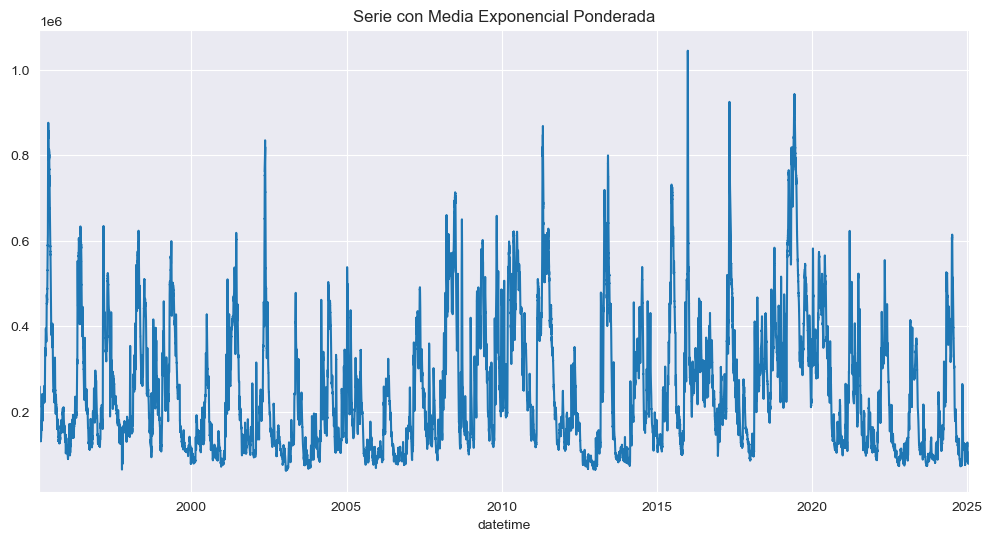

In [103]:
# Aplicar suavizado exponencial ponderado
df_resampled['height_ewm'] = df_resampled['height_imputed'].ewm(span=5, adjust=False).mean()

# Graficar la serie suavizada
df_resampled['height_ewm'].plot(figsize=(12, 6), title="Serie con Media Exponencial Ponderada")
plt.show()


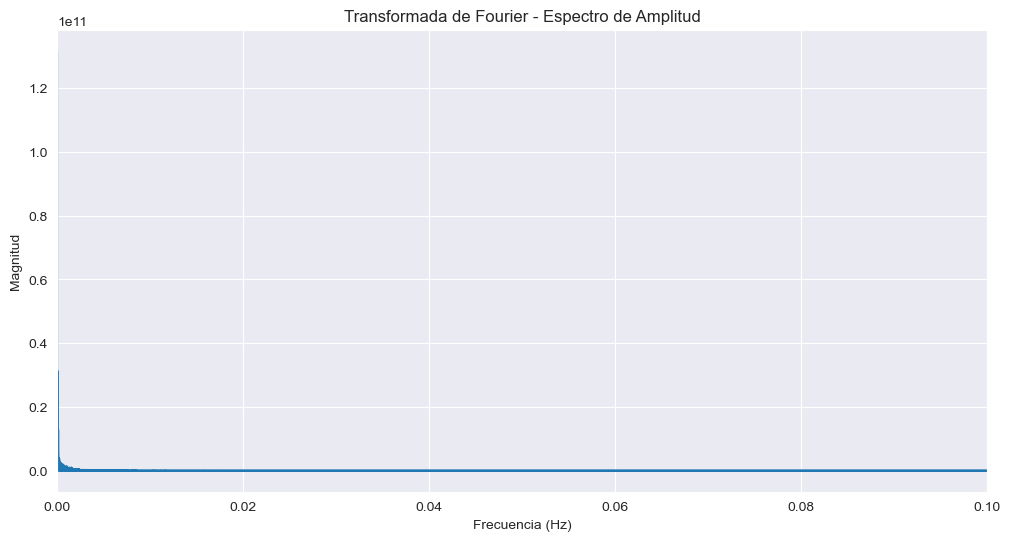

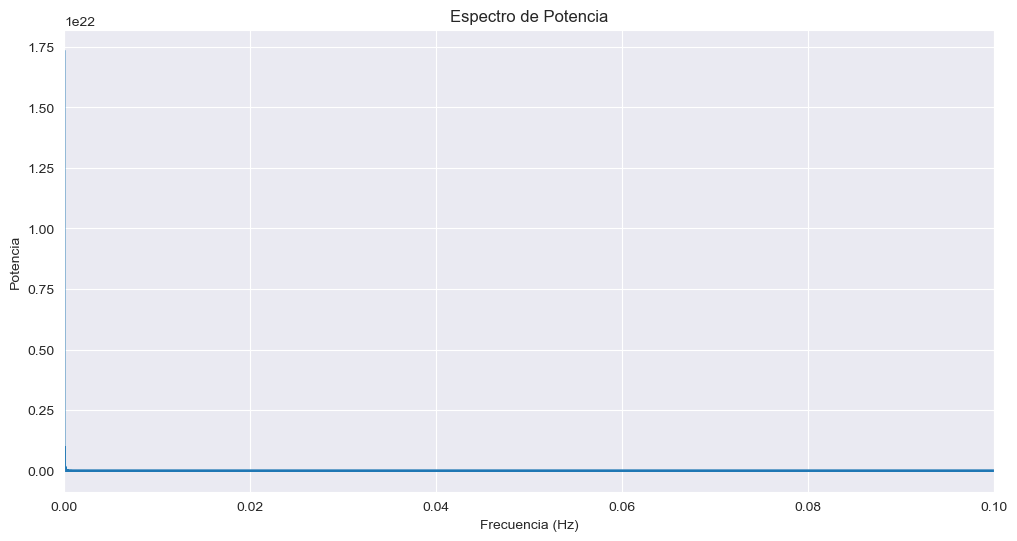

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Realizar la transformada de Fourier
# Suponemos que df_resampled['height_imputed'] es la serie temporal
data = df_resampled['height_imputed'].dropna()

# Realizar la FFT (Transformada Rápida de Fourier)
fft_result = np.fft.fft(data)
fft_freq = np.fft.fftfreq(len(data))

# Obtener la magnitud de la FFT (espectro de amplitud)
fft_magnitude = np.abs(fft_result)

# Graficar el espectro de amplitud
plt.figure(figsize=(12, 6))
plt.plot(fft_freq, fft_magnitude)
plt.title("Transformada de Fourier - Espectro de Amplitud")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.xlim(0, 0.1)  # Limitar el eje X para observar mejor las frecuencias bajas
plt.show()

# Para visualizar el espectro de potencia, se calcula el cuadrado de la magnitud
power_spectrum = np.square(fft_magnitude)

# Graficar el espectro de potencia
plt.figure(figsize=(12, 6))
plt.plot(fft_freq, power_spectrum)
plt.title("Espectro de Potencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Potencia")
plt.xlim(0, 0.1)  # Limitar el eje X para observar mejor las frecuencias bajas
plt.show()


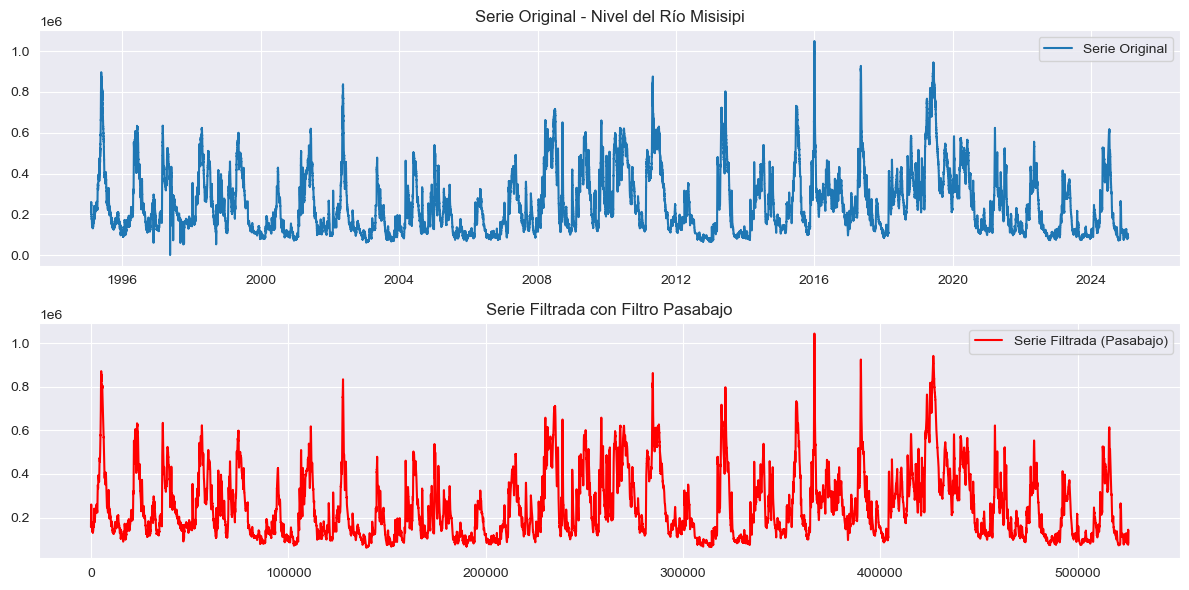

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Realizar la transformada de Fourier
data = df_resampled['height_imputed'].dropna()

# Realizar la FFT
fft_result = np.fft.fft(data)
fft_freq = np.fft.fftfreq(len(data))

# Establecer un umbral para las frecuencias altas (esto depende de la serie)
threshold_freq = 0.05  # Esto es un ejemplo, ajusta según tu caso

# Aplicar filtro pasabajo (eliminamos frecuencias altas)
fft_result_filtered = fft_result.copy()
fft_result_filtered[np.abs(fft_freq) > threshold_freq] = 0

# Realizar la inversa de la FFT para obtener la señal filtrada
data_filtered = np.fft.ifft(fft_result_filtered)

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Original
plt.subplot(2, 1, 1)
plt.plot(data, label="Serie Original")
plt.title("Serie Original - Nivel del Río Misisipi")
plt.legend()

# Filtrada
plt.subplot(2, 1, 2)
plt.plot(data_filtered, label="Serie Filtrada (Pasabajo)", color='red')
plt.title("Serie Filtrada con Filtro Pasabajo")
plt.legend()

plt.tight_layout()
plt.show()


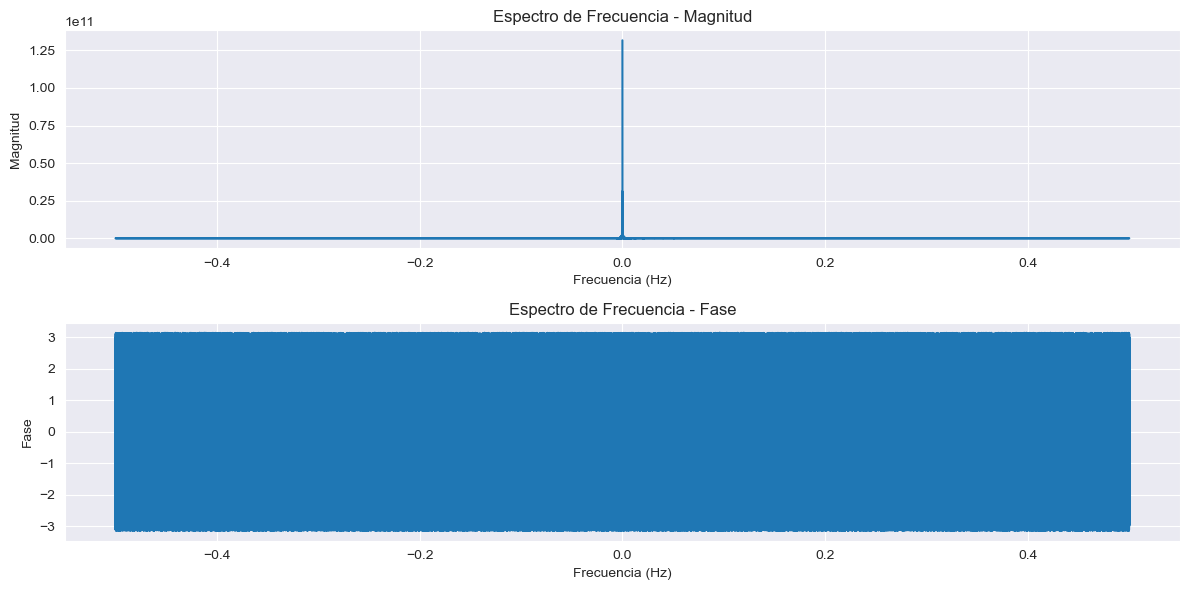

In [106]:
# Visualizar el espectro de frecuencias
fft_magnitude = np.abs(fft_result)  # Magnitud de la FFT
fft_phase = np.angle(fft_result)    # Fase de la FFT

# Graficar el espectro de frecuencias
plt.figure(figsize=(12, 6))

# Magnitud del espectro
plt.subplot(2, 1, 1)
plt.plot(fft_freq, fft_magnitude)
plt.title("Espectro de Frecuencia - Magnitud")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")

# Fase del espectro
plt.subplot(2, 1, 2)
plt.plot(fft_freq, fft_phase)
plt.title("Espectro de Frecuencia - Fase")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase")

plt.tight_layout()
plt.show()


In [107]:
# Calcular el IQR
Q1 = df_resampled['height_imputed'].quantile(0.25)
Q3 = df_resampled['height_imputed'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites superior e inferior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores atípicos
outliers_iqr = df_resampled[(df_resampled['height_imputed'] < lower_bound) | (df_resampled['height_imputed'] > upper_bound)]

# Mostrar los outliers
print(outliers_iqr)


                       height  height_moving_avg  month     height_ewm  \
datetime                                                                 
1995-05-18 05:00:00  651000.0           638901.0    5.0  639836.877409   
1995-05-18 06:00:00  650000.0           644101.0    5.0  644261.389959   
1995-05-18 06:30:00       NaN           646601.0    NaN  646341.259973   
1995-05-18 07:00:00  657000.0           650601.0    5.0  649894.506649   
1995-05-18 07:30:00       NaN           651101.0    NaN  651096.671099   
...                       ...                ...    ...            ...   
2019-07-09 12:00:00  648000.0           648801.0    7.0  648858.122898   
2019-07-09 12:30:00  647000.0           648601.0    7.0  648239.081932   
2019-07-09 13:00:00  648000.0           648201.0    7.0  648159.721288   
2019-07-09 14:30:00  647000.0           646401.0    7.0  646603.584085   
2019-07-09 17:00:00  647000.0           645201.0    7.0  645623.562513   

                     height_imputed  

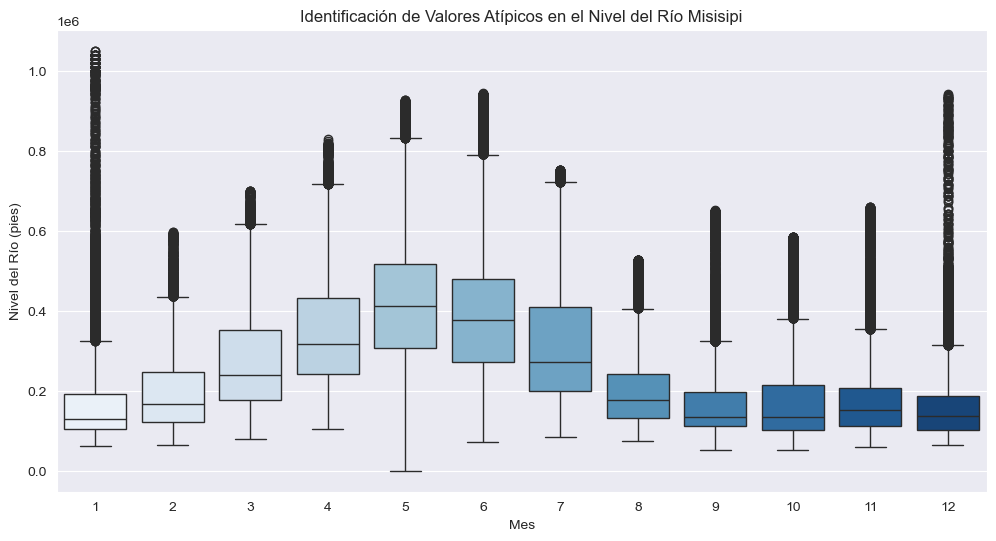

In [108]:
# Gráfica de caja para identificar valores atípicos
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_resampled.index.month, y=df_resampled['height_imputed'], palette="Blues")
plt.title('Identificación de Valores Atípicos en el Nivel del Río Misisipi')
plt.xlabel('Mes')
plt.ylabel('Nivel del Río (pies)')
plt.show()
